# <center> Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

<center> Author Arya Octavian

---

<B> PART 1 - EDA VISUALIZATION

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 8)
rcParams['lines.linewidth'] = 3
rcParams['axes.titlesize'] = 'x-large'
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'

In [3]:
df = pd.read_csv("marketing_campaign_data.csv")
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## HANDLING MISSING VALUES

In [5]:
# Copy data to avoid error in original dataset

df_copy = df.copy()

In [6]:
# Drop Unnamed: 0 column

del df_copy['Unnamed: 0']

In [7]:
# Checking features with missing value and sort them by quantity of the missing value

df_copy.isnull().sum().sort_values(ascending=False)[:10]

Income               24
ID                    0
NumDealsPurchases     0
Z_Revenue             0
Z_CostContact         0
Complain              0
AcceptedCmp2          0
AcceptedCmp1          0
AcceptedCmp5          0
AcceptedCmp4          0
dtype: int64

In [8]:
df_copy.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
df_copy['Income'].fillna(df_copy.Income.median(), inplace=True)

print(df_copy.isna().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


## CHECKING DUPLICATED DATA

In [10]:
df_copy.duplicated().any()

False

## HANDLING OUTLIERS

In [11]:
nums = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
        'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

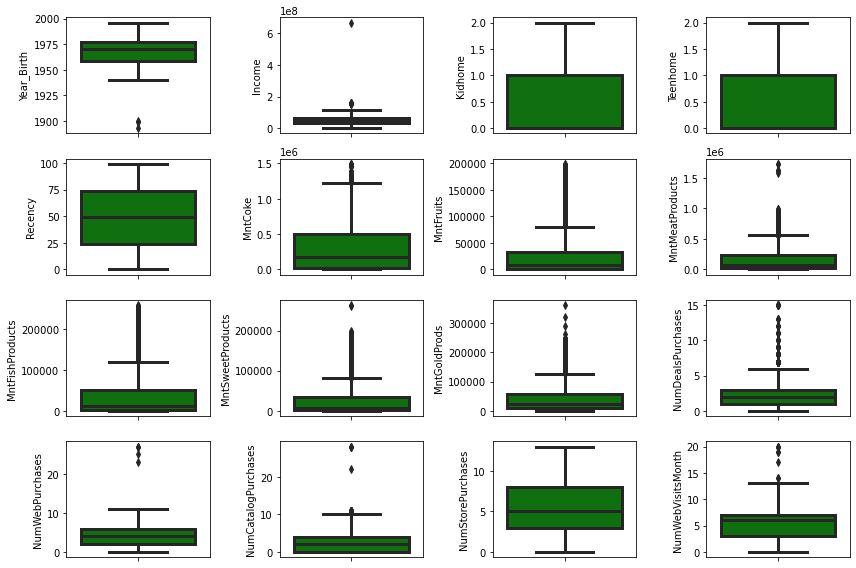

In [12]:
for i in range(len(nums)):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df_copy[nums[i]],color='g',orient='h')
    plt.tight_layout()

In [13]:
from scipy import stats

print(f'Total rows before filtering the outlier: {len(df_copy)}')

for col in ['Income']:
    zscore = np.abs(stats.zscore(df_copy[col]))
    filtered = (zscore < 3)
    df_filtered = df_copy[filtered]
    
df_filtered = df_filtered.drop(df_filtered[df_filtered.Year_Birth < 1940].index)

print(f'Total rows after filtering the outlier: {len(df_filtered)}')

Total rows before filtering the outlier: 2240
Total rows after filtering the outlier: 2229


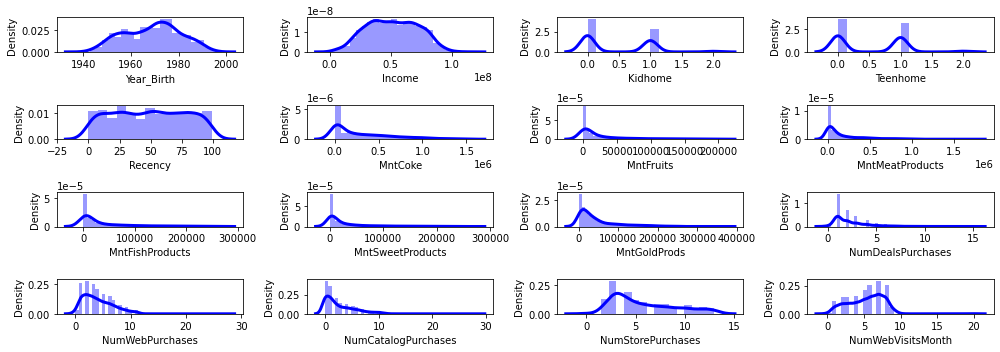

In [14]:
plt.figure(figsize=(14, 5))
for i in range(0, len(nums)):
    plt.subplot (4, 4, i+1)
    sns.distplot(df_filtered[nums[i]], color='b')
    plt.xlabel(nums[i])
    plt.tight_layout()

## EXPLORATORY DATA ANALYSIS

### Generating new features

In [15]:
# New General features

df_filtered['Age'] = 2022 - df_filtered['Year_Birth']

df_filtered['NumOfChildren'] = df_filtered['Kidhome'] + df_filtered['Teenhome']

df_filtered['TotalTransaction'] = df_filtered['NumDealsPurchases'] + df_filtered['NumWebPurchases'] + df_filtered['NumCatalogPurchases'] + df_filtered['NumStorePurchases']
                                
df_filtered['TotalSpending'] = df_filtered['MntCoke'] + df_filtered['MntFruits'] + df_filtered['MntMeatProducts'] + df_filtered['MntFishProducts'] + df_filtered['MntSweetProducts'] + df_filtered['MntGoldProds']

df_filtered['TotalCampaign'] = df_filtered['AcceptedCmp1'] + df_filtered['AcceptedCmp2'] + df_filtered['AcceptedCmp3'] + df_filtered['AcceptedCmp4'] + df_filtered['AcceptedCmp5'] + df_filtered['Response']

In [16]:
# Conversion features

df_filtered['CRT_Visit'] = round(df_filtered['NumWebPurchases']/(df_filtered['NumWebVisitsMonth'])*100,0)

df_filtered['CRT_Campaign'] = round(df_filtered['TotalCampaign']/6*100,0)

In [17]:
# Feature of custome's first enrollment
df_filtered['Dt_Customer']= pd.to_datetime(df_filtered['Dt_Customer'])

df_filtered['Year'] = df_filtered["Dt_Customer"].dt.year

df_filtered['Month'] = df_filtered["Dt_Customer"].dt.month

In [18]:
# Grouping Features

# Grouping Reference https://sepakat.bappenas.go.id/wiki/Kelompok_Usia#:~:text=35%2D44%20tahun%3A%20Kelompok%20usia,ke%20atas%3A%20Kelompok%20usia%20lanjut

df_filtered['Group_Age'] = np.where(df_filtered['Year_Birth']<=1957,'Lanjut Usia (65 Tahun Ke Atas)',
                                   np.where(df_filtered['Year_Birth']<=1967, 'Usia Pensiun (55-64 Tahun)', 
                                            np.where(df_filtered['Year_Birth']<=1977, 'Pra-Pensiun (45-54 Tahun)',
                                                     np.where(df_filtered['Year_Birth']<=1987, 'Paruh Baya (35-44 Tahun)',
                                                              np.where(df_filtered['Year_Birth']<=1997, 'Pekerja Awal (25-34 Tahun)',
                                                              'Usia Muda (15-24 Tahun)')))))

GA_Order = 'Pekerja Awal (25-34 Tahun)', 'Paruh Baya (35-44 Tahun)', 'Pra-Pensiun (45-54 Tahun)', 'Usia Pensiun (55-64 Tahun)', 'Lanjut Usia (65 Tahun Ke Atas)'
df_filtered['Group_Age'] = pd.Categorical(df_filtered['Group_Age'], categories=GA_Order, ordered=True)

In [19]:
df_filtered.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Age,NumOfChildren,TotalTransaction,TotalSpending,TotalCampaign,CRT_Visit,CRT_Campaign,Year,Month,Group_Age
287,8148,1956,S2,Bertunangan,50898000.0,1,1,2013-08-01,88,285000,...,66,2,33,859000,0,120.0,0.0,2013,8,Lanjut Usia (65 Tahun Ke Atas)
1671,1964,1951,S1,Bertunangan,86610000.0,0,0,2013-05-09,66,446000,...,71,0,18,1603000,0,250.0,0.0,2013,5,Lanjut Usia (65 Tahun Ke Atas)
455,4148,1972,S1,Menikah,38988000.0,1,2,2012-08-20,90,164000,...,50,3,19,348000,0,62.0,0.0,2012,8,Pra-Pensiun (45-54 Tahun)


### Discount Analysis

In [20]:
month = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
df_monthly = df_filtered.copy()
df_monthly.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)

month_order = 'Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
df_monthly['Month'] = pd.Categorical(df_monthly['Month'], categories=month_order, ordered=True)

df_viz1 = df_monthly.groupby(['Year','Month']).agg({'NumDealsPurchases' : 'sum'}).reset_index()
df_viz1

,Year,Month,NumDealsPurchases
0,2012,Jan,55
1,2012,Feb,20
2,2012,Mar,64
3,2012,Apr,53
4,2012,May,55
5,2012,Jun,31
6,2012,Jul,71
7,2012,Aug,291
8,2012,Sep,202
9,2012,Oct,220


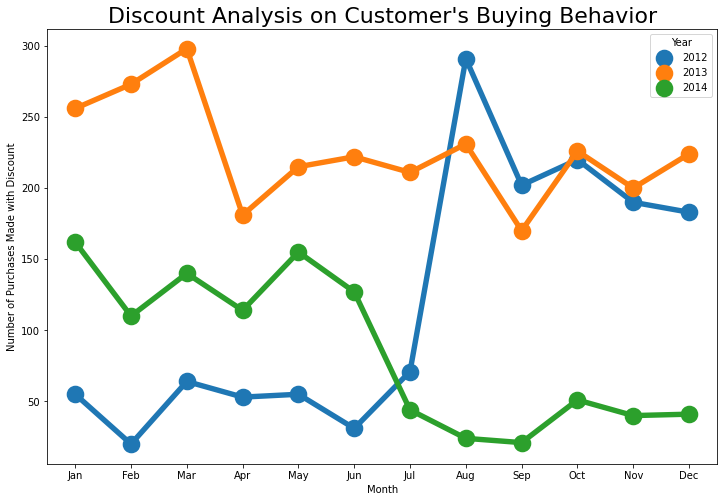

In [21]:
sns.pointplot(x='Month', y="NumDealsPurchases", data=df_viz1, hue="Year")
plt.title("Discount Analysis on Customer's Buying Behavior",fontsize=22)
plt.ylabel('Number of Purchases Made with Discount')
plt.show()

### Income vs Total Spending

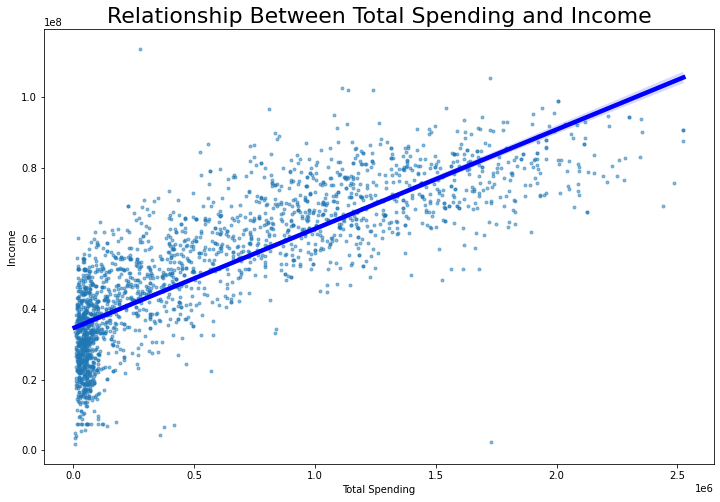

In [22]:
sns.regplot(x='TotalSpending', y='Income', data=df_filtered, marker=".", scatter_kws={'alpha':0.5}, line_kws={'color':"blue"})
plt.xlabel('Total Spending')
plt.title('Relationship Between Total Spending and Income', size = 22)
plt.show()

### Education Level Analysis on Total Transaction

In [23]:
df_viz2 = df_filtered.groupby(['Education']).agg({'TotalTransaction' : 'sum'}).reset_index()

df_viz2['TransRatio(%)'] = round(df_viz2['TotalTransaction']/df_viz2['TotalTransaction'].sum() * 100, 0)

df_viz2.sort_values(by =['TransRatio(%)'], ascending=False)

,Education,TotalTransaction,TransRatio(%)
1,S1,16855,51.0
3,S3,7596,23.0
2,S2,5521,17.0
0,D3,2792,8.0
4,SMA,379,1.0


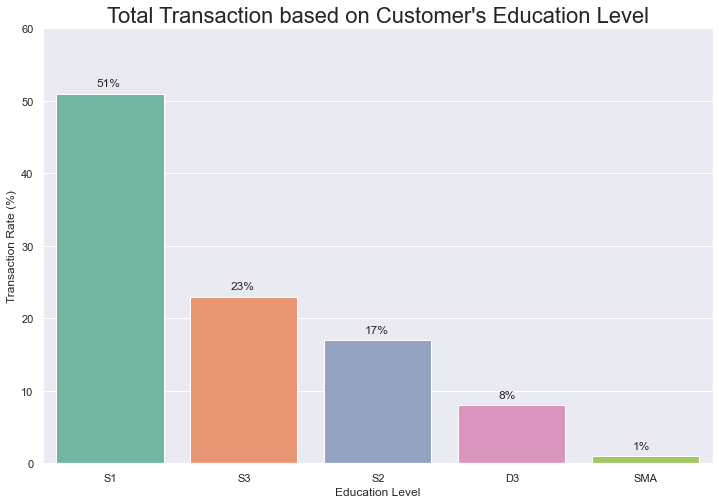

In [24]:
sns.set_theme(style='darkgrid', palette='Set2')
sns.barplot(data=df_viz2 , x='Education', y='TransRatio(%)', order=['S1','S3','S2','D3','SMA'])
plt.title("Total Transaction based on Customer's Education Level",fontsize=22)
plt.ylabel('Transaction Rate (%)')
plt.xlabel('Education Level')

plt.annotate(xy=(2.9, 9), text='8%')
plt.annotate(xy=(-0.1, 52), text='51%')
plt.annotate(xy=(1.9, 18), text='17%')
plt.annotate(xy=(0.9, 24), text='23%')
plt.annotate(xy=(3.9, 2), text='1%')
plt.ylim(0,60)

plt.show()

### Marital Status Analysis on Total Transaction

In [25]:
df_viz3 = df_filtered.groupby(['Marital_Status']).agg({'TotalTransaction' : 'sum'}).reset_index()

df_viz3['TransRatio(%)'] = round(df_viz3['TotalTransaction']/df_viz3['TotalTransaction'].sum() * 100, 2)

df_viz3.sort_values(by =['TransRatio(%)'], ascending=False)

,Marital_Status,TotalTransaction,TransRatio(%)
5,Menikah,12841,38.74
0,Bertunangan,8537,25.76
4,Lajang,6910,20.85
1,Cerai,3529,10.65
3,Janda,1286,3.88
2,Duda,40,0.12


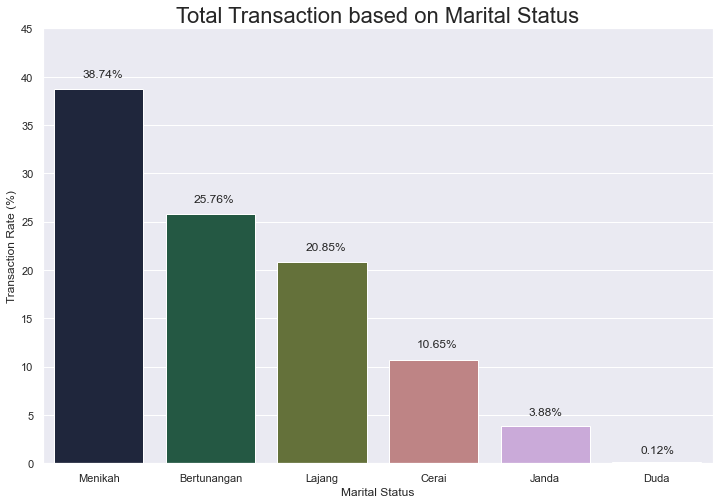

In [26]:
sns.set_theme(style='darkgrid', palette='cubehelix')
sns.barplot(data=df_viz3 , x='Marital_Status', y='TransRatio(%)', order=['Menikah','Bertunangan','Lajang','Cerai','Janda', 'Duda'])
plt.title('Total Transaction based on Marital Status',fontsize=22)
plt.ylabel('Transaction Rate (%)')
plt.xlabel('Marital Status')

plt.annotate(xy=(-0.15, 40), text='38.74%')
plt.annotate(xy=(0.85, 27), text='25.76%')
plt.annotate(xy=(1.85, 22), text='20.85%')
plt.annotate(xy=(2.85, 12), text='10.65%')
plt.annotate(xy=(3.85, 5), text='3.88%')
plt.annotate(xy=(4.85, 1), text='0.12%')
plt.ylim(0,45)

plt.show()

### Group Age Analysis on Total Transaction

In [27]:
df_viz4 = df_filtered.groupby(['Group_Age']).agg({'TotalTransaction' : 'sum'}).reset_index()

df_viz4['TransRatio(%)'] = round(df_viz4['TotalTransaction']/df_viz4['TotalTransaction'].sum() * 100, 0)
df_viz4

,Group_Age,TotalTransaction,TransRatio(%)
0,Pekerja Awal (25-34 Tahun),1659,5.0
1,Paruh Baya (35-44 Tahun),5538,17.0
2,Pra-Pensiun (45-54 Tahun),10423,31.0
3,Usia Pensiun (55-64 Tahun),7732,23.0
4,Lanjut Usia (65 Tahun Ke Atas),7791,24.0


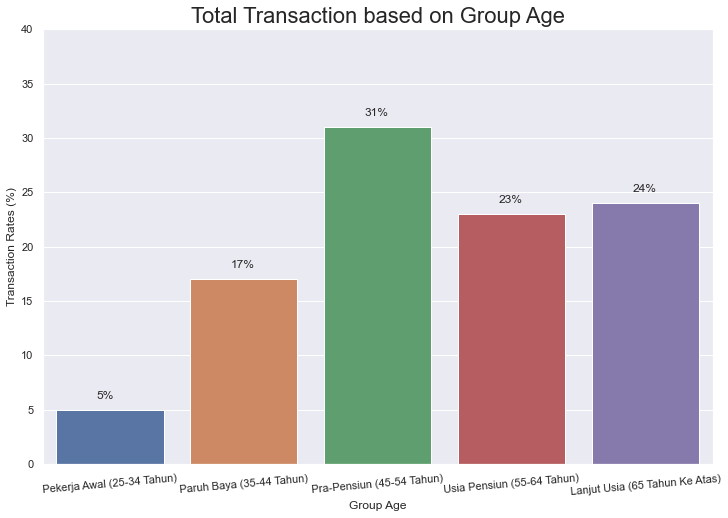

In [28]:
sns.set_theme(style='darkgrid', palette='deep')
sns.barplot(data=df_viz4 , x='Group_Age', y='TransRatio(%)')
plt.title('Total Transaction based on Group Age',fontsize=22)
plt.ylabel('Transaction Rates (%)')
plt.xlabel('Group Age')
plt.xticks(rotation = 5)

plt.annotate(xy=(2.9, 24), text='23%')
plt.annotate(xy=(-0.1, 6), text='5%')
plt.annotate(xy=(1.9, 32), text='31%')
plt.annotate(xy=(0.9, 18), text='17%')
plt.annotate(xy=(3.9, 25), text='24%')
plt.ylim(0,40)

plt.show()

### Response Conversion Rate for Current Campaign

In [29]:
df_viz5 = df_filtered.groupby(['Group_Age','Response']).agg({'ID' : 'count'}).reset_index()
df_viz5.columns = ['Group_Age', 'Response', 'Total_Customer']

df_viz5['Ratio(%)'] = df_viz5.groupby('Group_Age').apply(lambda x: round(x.Total_Customer/x.Total_Customer.sum() *100, 0)).values
df_viz5

,Group_Age,Response,Total_Customer,Ratio(%)
0,Pekerja Awal (25-34 Tahun),0,103,86.0
1,Pekerja Awal (25-34 Tahun),1,17,14.0
2,Paruh Baya (35-44 Tahun),0,360,83.0
3,Paruh Baya (35-44 Tahun),1,73,17.0
4,Pra-Pensiun (45-54 Tahun),0,614,85.0
5,Pra-Pensiun (45-54 Tahun),1,112,15.0
6,Usia Pensiun (55-64 Tahun),0,430,88.0
7,Usia Pensiun (55-64 Tahun),1,58,12.0
8,Lanjut Usia (65 Tahun Ke Atas),0,388,84.0
9,Lanjut Usia (65 Tahun Ke Atas),1,74,16.0


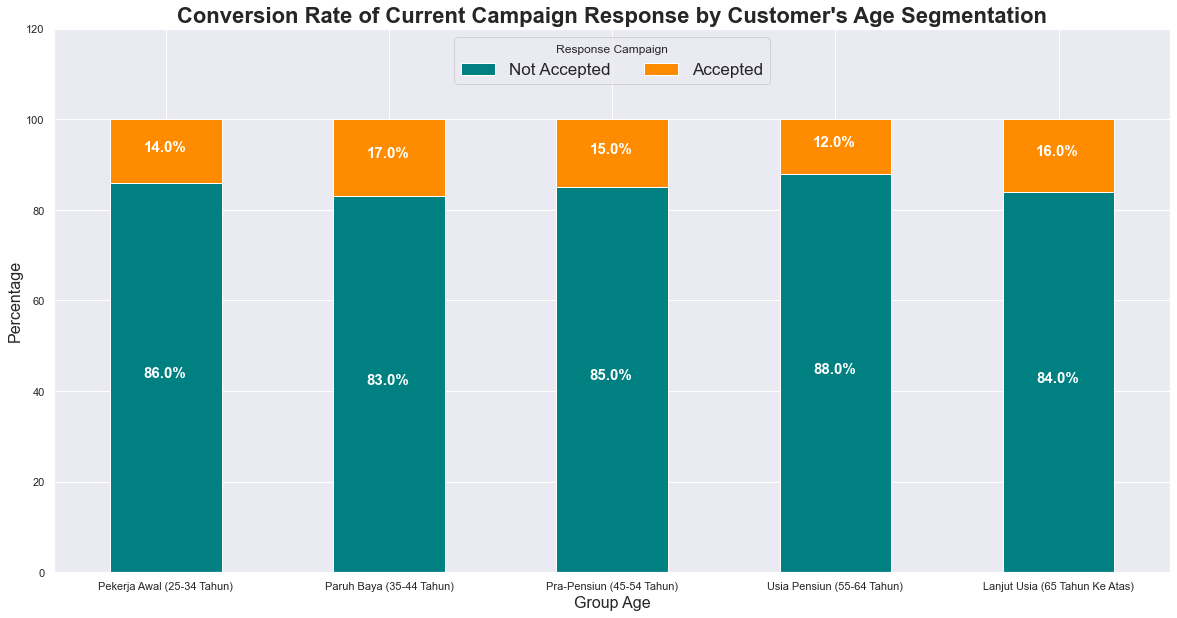

In [30]:
df_viz5_pivot = df_viz5.pivot_table(index='Group_Age', columns='Response', values='Ratio(%)')

df_viz5_pivot.plot(kind='bar', color=['teal','darkorange'], stacked=True, figsize=(20,10))

legend = plt.legend(loc="upper center", ncol=5, title='Response Campaign', fontsize = 17)
legend.get_texts()[0].set_text('Not Accepted')
legend.get_texts()[1].set_text('Accepted')

plt.xlabel('Group Age', fontsize=16)
plt.xticks(rotation=0, ha="center")
plt.ylabel('Percentage', fontsize=16)
plt.title("Conversion Rate of Current Campaign Response by Customer's Age Segmentation", fontsize=22, weight='bold')
plt.ylim(0,120)

for n, x in enumerate([*df_viz5_pivot.index.values]):
    for (proportion, y_loc) in zip(df_viz5_pivot.loc[x],
                                   df_viz5_pivot.loc[x].cumsum()):
                
        plt.text(x=n - 0.10,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion,0)}%', 
                 color="white",
                 fontsize=15,
                 fontweight="bold")

plt.show()

### Web Visit Conversion Rate

In [31]:
# There are infinite numbers because of 0 web visit

df_filtered['CRT_Visit'].describe()

count    2228.0
mean        inf
std         NaN
min         0.0
25%        33.0
50%        75.0
75%       150.0
max         inf
Name: CRT_Visit, dtype: float64

In [32]:
df_filtered['CRT_Visit'].replace([np.inf, -np.inf], 0, inplace=True)
df_filtered['CRT_Visit'].describe()

count    2228.000000
mean      108.969928
std       132.952586
min         0.000000
25%        33.000000
50%        75.000000
75%       150.000000
max      2700.000000
Name: CRT_Visit, dtype: float64

In [33]:
df_cv = df_filtered.groupby(['Group_Age']).agg({'CRT_Visit' : 'sum'}).reset_index()
df_cv['Percentage'] = round(df_cv['CRT_Visit']/df_cv['CRT_Visit'].sum() *100,0)
df_cv

,Group_Age,CRT_Visit,Percentage
0,Pekerja Awal (25-34 Tahun),13788.0,6.0
1,Paruh Baya (35-44 Tahun),42531.0,18.0
2,Pra-Pensiun (45-54 Tahun),69757.0,29.0
3,Usia Pensiun (55-64 Tahun),53952.0,22.0
4,Lanjut Usia (65 Tahun Ke Atas),62757.0,26.0


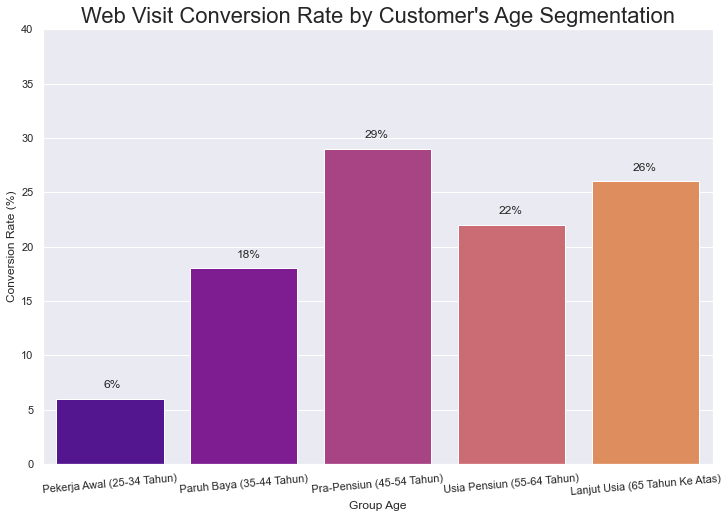

In [34]:
sns.set_theme(style='darkgrid', palette='plasma')
sns.barplot(data=df_cv , x='Group_Age', y='Percentage')
plt.title("Web Visit Conversion Rate by Customer's Age Segmentation",fontsize=22)
plt.xlabel('Group Age')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation = 5)

plt.annotate(xy=(-0.05, 7), text='6%')
plt.annotate(xy=(0.95, 19), text='18%')
plt.annotate(xy=(1.9, 30), text='29%')
plt.annotate(xy=(2.9, 23), text='22%')
plt.annotate(xy=(3.9, 27), text='26%')
plt.ylim(0,40)

plt.show()

### Group Age Behavior on Purchasing Method

In [35]:
dfp = df_filtered[["Group_Age", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].groupby(["Group_Age"]).sum().reset_index().sort_values(by=["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], ascending=False)
dfp

,Group_Age,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
2,Pra-Pensiun (45-54 Tahun),2906,1672,4007
4,Lanjut Usia (65 Tahun Ke Atas),2170,1530,2997
3,Usia Pensiun (55-64 Tahun),2116,1419,3007
1,Paruh Baya (35-44 Tahun),1544,890,2251
0,Pekerja Awal (25-34 Tahun),403,366,694


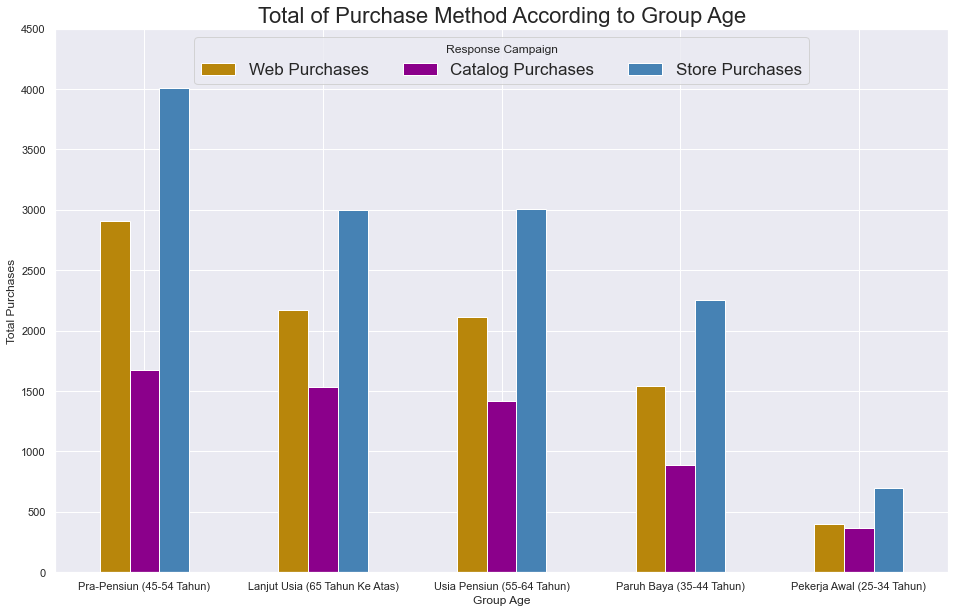

In [36]:
dfp.plot(x="Group_Age", ylabel= "Total Purchases", kind="bar", figsize=(16, 10), legend=True, grid=True , color=['darkgoldenrod','darkmagenta', 'steelblue'])

legend = plt.legend(loc="upper center", ncol=5, title='Response Campaign', fontsize = 17)
legend.get_texts()[0].set_text('Web Purchases')
legend.get_texts()[1].set_text('Catalog Purchases')
legend.get_texts()[2].set_text('Store Purchases')

plt.title("Total of Purchase Method According to Group Age", size = 22)
plt.xlabel('Group Age')
plt.xticks(rotation = 0)
plt.ylim(0,4500)

plt.show()

---

<B> PART 2 - DATA CLEANING & PREPROCESSING

In [37]:
df_fix = df_filtered.copy()
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2229 non-null   int64         
 1   Year_Birth           2229 non-null   int64         
 2   Education            2229 non-null   object        
 3   Marital_Status       2229 non-null   object        
 4   Income               2229 non-null   float64       
 5   Kidhome              2229 non-null   int64         
 6   Teenhome             2229 non-null   int64         
 7   Dt_Customer          2229 non-null   datetime64[ns]
 8   Recency              2229 non-null   int64         
 9   MntCoke              2229 non-null   int64         
 10  MntFruits            2229 non-null   int64         
 11  MntMeatProducts      2229 non-null   int64         
 12  MntFishProducts      2229 non-null   int64         
 13  MntSweetProducts     2229 non-nul

## Feature Selection 1

In [38]:
# Delete unnecessary categorical and date features
df_fix = df_fix.drop(['ID', 'Dt_Customer', 'Year_Birth', 'Year', 'Month'],axis=1)

# Delete boolean-like features
df_fix = df_fix.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'],axis=1)

# Delete features with constant values
df_fix = df_fix.drop(['Z_CostContact', 'Z_Revenue'],axis=1)

df_fix.shape

(2229, 25)

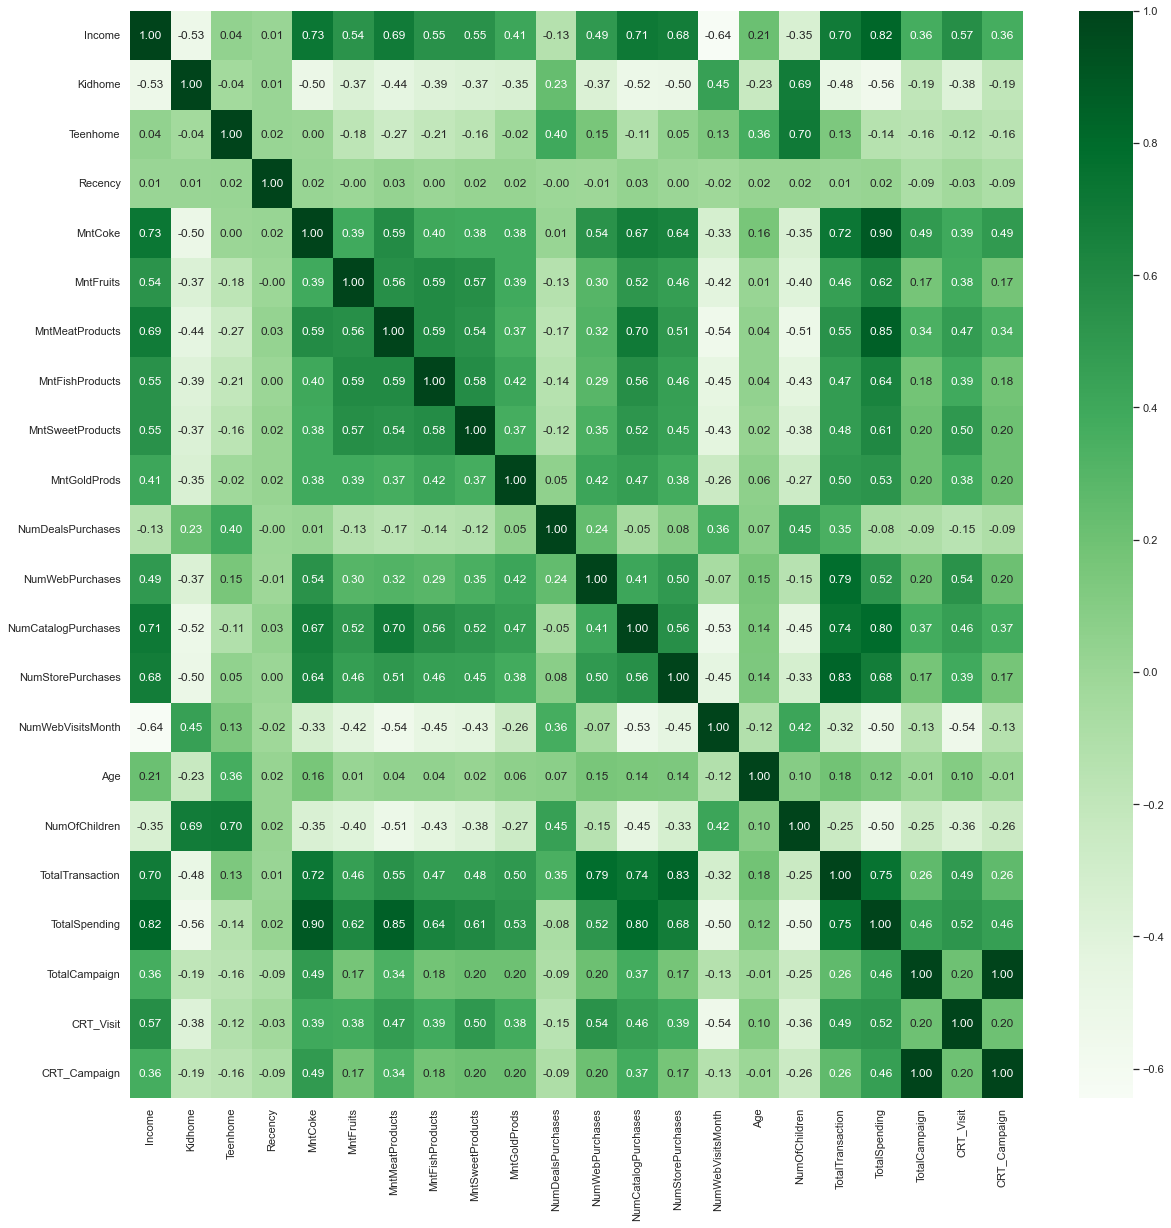

In [39]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_fix.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

## Feature Selection 2

In [40]:
# Delete redundant numerical features

df_fix = df_fix.drop(['TotalSpending', 'TotalCampaign', 'TotalTransaction'],axis=1)

# Delete same features for dimensionality reduction

df_fix = df_fix.drop(['Kidhome', 'Teenhome', 'Age', 'CRT_Visit'],axis=1)

df_fix.shape

(2229, 18)

In [41]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2229 non-null   object  
 1   Marital_Status       2229 non-null   object  
 2   Income               2229 non-null   float64 
 3   Recency              2229 non-null   int64   
 4   MntCoke              2229 non-null   int64   
 5   MntFruits            2229 non-null   int64   
 6   MntMeatProducts      2229 non-null   int64   
 7   MntFishProducts      2229 non-null   int64   
 8   MntSweetProducts     2229 non-null   int64   
 9   MntGoldProds         2229 non-null   int64   
 10  NumDealsPurchases    2229 non-null   int64   
 11  NumWebPurchases      2229 non-null   int64   
 12  NumCatalogPurchases  2229 non-null   int64   
 13  NumStorePurchases    2229 non-null   int64   
 14  NumWebVisitsMonth    2229 non-null   int64   
 15  NumOfChildren        

## Feature Encoding

In [42]:
df_final = df_fix.copy()

df_final = pd.get_dummies(df_final, columns=['Group_Age', "Education", "Marital_Status"])
df_final.head(3)

,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,58138000.0,58,635000,88000,546000,172000,88000,88000,3,8,...,1,0,0,0,0,0,0,0,1,0
1,46344000.0,38,11000,1000,6000,2000,1000,6000,2,1,...,1,0,0,0,0,0,0,0,1,0
2,71613000.0,26,426000,49000,127000,111000,21000,42000,1,8,...,1,0,0,0,1,0,0,0,0,0


## Standardization

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_final)
df_final_std = pd.DataFrame(scaler.transform(df_final), columns= df_final.columns)

df_final_std.head(3)

,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,0.316484,0.307314,0.980166,1.550778,1.736151,2.456789,1.472029,0.842690,0.358938,1.405471,...,0.991512,-0.445407,-0.524568,-0.157568,-0.589612,-0.339201,-0.036711,-0.189158,1.901291,-0.793338
1,-0.256135,-0.383771,-0.873191,-0.637618,-0.726371,-0.651738,-0.632996,-0.731824,-0.168815,-1.117198,...,0.991512,-0.445407,-0.524568,-0.157568,-0.589612,-0.339201,-0.036711,-0.189158,1.901291,-0.793338
2,0.970719,-0.798422,0.359410,0.569773,-0.174584,1.341376,-0.149082,-0.040574,-0.696567,1.405471,...,0.991512,-0.445407,-0.524568,-0.157568,1.696031,-0.339201,-0.036711,-0.189158,-0.525958,-0.793338


---

<B> PART 3 - Clustering using K-Means

## Elbow Method

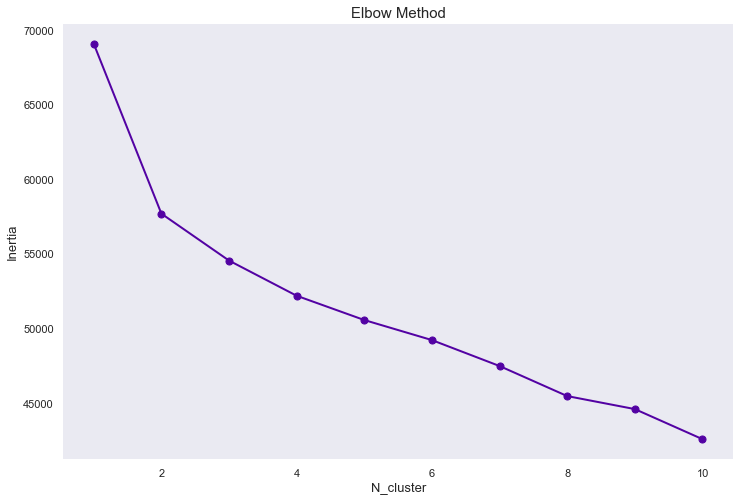

In [44]:
#Evaluation using Elbow Method
from sklearn.cluster import KMeans
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_final_std)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(12,8))
plt.scatter(range(1,11),inertia,s=50)
ax = plt.gca()
plt.plot(range(1,11),inertia,linewidth=2)
plt.title('Elbow Method',fontsize=15)
plt.grid()
ax.spines[:].set_visible(False)
plt.ylabel('Inertia',fontsize=13)
plt.xlabel('N_cluster',fontsize=13)
plt.show()

In [45]:
inertia_table = pd.DataFrame((pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100, columns=['Inertia Reduction (%)'])
inertia_table

,Inertia Reduction (%)
0,16.463827
1,5.444264
2,4.315912
3,3.114192
4,2.654232
5,3.527818
6,4.235430
7,1.915436
8,4.514180
9,NaN


## KMeans Clustering

In [46]:
kmeans = KMeans(n_clusters=3,random_state=42).fit(df_final_std)
kmeans.fit(df_final_std)

KMeans(n_clusters=3, random_state=42)

In [47]:
df_cluster = pd.DataFrame(data=df_final_std)
df_cluster['k_label'] = kmeans.labels_
df_cluster

,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Education_S2,Education_S3,Education_SMA,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,k_label
0,0.316484,0.307314,0.980166,1.550778,1.736151,2.456789,1.472029,0.842690,0.358938,1.405471,...,-0.445407,-0.524568,-0.157568,-0.589612,-0.339201,-0.036711,-0.189158,1.901291,-0.793338,0
1,-0.256135,-0.383771,-0.873191,-0.637618,-0.726371,-0.651738,-0.632996,-0.731824,-0.168815,-1.117198,...,-0.445407,-0.524568,-0.157568,-0.589612,-0.339201,-0.036711,-0.189158,1.901291,-0.793338,1
2,0.970719,-0.798422,0.359410,0.569773,-0.174584,1.341376,-0.149082,-0.040574,-0.696567,1.405471,...,-0.445407,-0.524568,-0.157568,1.696031,-0.339201,-0.036711,-0.189158,-0.525958,-0.793338,0
3,-1.212506,-0.798422,-0.873191,-0.562156,-0.662528,-0.505455,-0.584604,-0.751025,-0.168815,-0.756817,...,-0.445407,-0.524568,-0.157568,1.696031,-0.339201,-0.036711,-0.189158,-0.525958,-0.793338,1
4,0.324010,1.551268,-0.392031,0.418849,-0.215626,0.152822,-0.003908,-0.559011,1.414444,0.324327,...,-0.445407,1.906330,-0.157568,-0.589612,-0.339201,-0.036711,-0.189158,-0.525958,1.260496,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,0.466266,-0.107337,1.199955,0.418849,0.076229,0.079680,2.197900,3.895711,-0.168815,1.765853,...,-0.445407,-0.524568,-0.157568,-0.589612,-0.339201,-0.036711,-0.189158,-0.525958,1.260496,2
2225,0.601774,0.238206,0.300008,-0.662772,-0.616926,-0.688309,-0.657191,-0.693421,2.469949,1.405471,...,-0.445407,1.906330,-0.157568,1.696031,-0.339201,-0.036711,-0.189158,-0.525958,-0.793338,2
2226,0.260310,1.447605,1.791009,0.544619,0.235837,-0.103175,-0.366843,-0.386199,-0.696567,-0.756817,...,-0.445407,-0.524568,-0.157568,-0.589612,2.948102,-0.036711,-0.189158,-0.525958,-0.793338,0
2227,0.855748,-1.420399,0.365350,0.091848,0.222156,0.774527,0.068679,0.324253,-0.168815,0.684708,...,2.245139,-0.524568,-0.157568,1.696031,-0.339201,-0.036711,-0.189158,-0.525958,-0.793338,2


## Dimentionality Reduction

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_cluster)
df_pca = pca.transform(df_cluster)

In [49]:
df_pca = pd.DataFrame(data = df_pca, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = kmeans.labels_
df_pca.head()

,PC 1,PC 2,cluster
0,4.199670,-0.623663,0
1,-2.185313,-0.767354,1
2,2.072388,-0.351622,0
3,-2.314714,-1.618666,1
4,-0.304968,0.836177,2


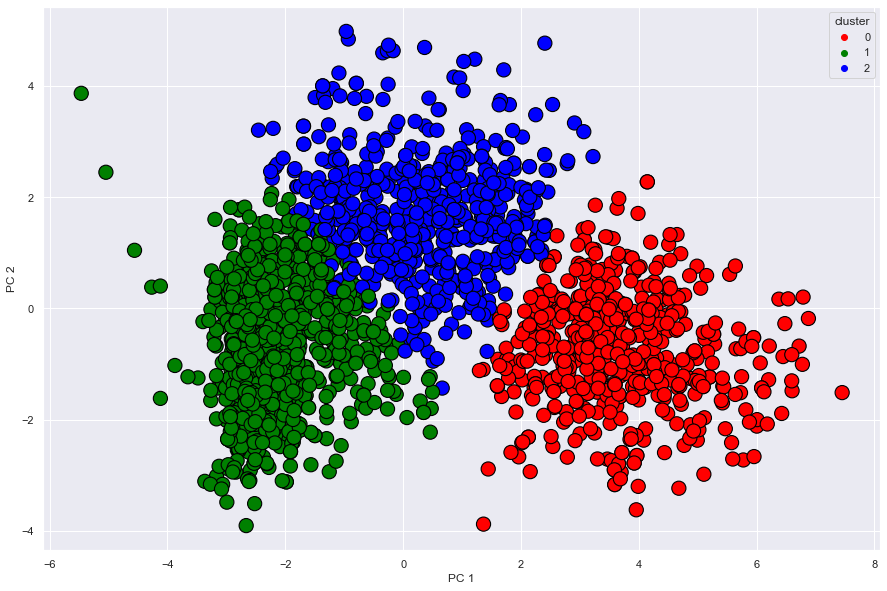

In [50]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df_pca["PC 1"], y=df_pca["PC 2"], hue=df_pca['cluster'],
                s=200, edgecolor='black', palette=['red','green','blue'])
plt.show()

## Evaluation : Silhoutte Score

In [51]:
from sklearn.metrics import silhouette_score

print(f'Silhouette Score(n=3): {silhouette_score(df_pca, kmeans.labels_)}')

Silhouette Score(n=3): 0.5481251982109148


## Interpretation

In [52]:
df_final['k_label'] = kmeans.labels_
df_final

,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Education_S2,Education_S3,Education_SMA,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,k_label
0,58138000.0,58,635000,88000,546000,172000,88000,88000,3,8,...,0,0,0,0,0,0,0,1,0,0
1,46344000.0,38,11000,1000,6000,2000,1000,6000,2,1,...,0,0,0,0,0,0,0,1,0,1
2,71613000.0,26,426000,49000,127000,111000,21000,42000,1,8,...,0,0,0,1,0,0,0,0,0,0
3,26646000.0,26,11000,4000,20000,10000,3000,5000,2,2,...,0,0,0,1,0,0,0,0,0,1
4,58293000.0,94,173000,43000,118000,46000,27000,15000,5,5,...,0,1,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223000.0,46,709000,43000,182000,42000,118000,247000,2,9,...,0,0,0,0,0,0,0,0,1,2
2236,64014000.0,56,406000,0,30000,0,0,8000,7,8,...,0,1,0,1,0,0,0,0,0,2
2237,56981000.0,91,908000,48000,217000,32000,12000,24000,1,2,...,0,0,0,0,1,0,0,0,0,0
2238,69245000.0,8,428000,30000,214000,80000,30000,61000,2,6,...,1,0,0,1,0,0,0,0,0,2


-----

<b> Part 4 - EDA Interpretation

## Interpretation

In [53]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Income                                    2229 non-null   float64
 1   Recency                                   2229 non-null   int64  
 2   MntCoke                                   2229 non-null   int64  
 3   MntFruits                                 2229 non-null   int64  
 4   MntMeatProducts                           2229 non-null   int64  
 5   MntFishProducts                           2229 non-null   int64  
 6   MntSweetProducts                          2229 non-null   int64  
 7   MntGoldProds                              2229 non-null   int64  
 8   NumDealsPurchases                         2229 non-null   int64  
 9   NumWebPurchases                           2229 non-null   int64  
 10  NumCatalogPurchases                 

In [54]:
df_cluster_interpretation_1 = df_final.groupby('k_label').agg({'Income' : 'mean',
                                                               'Recency' : 'mean',
                                                               'MntCoke' : 'mean',
                                                               'MntMeatProducts' : 'mean',
                                                               'MntFishProducts' : 'mean',
                                                               'MntSweetProducts' : 'mean',
                                                               'MntGoldProds' : 'mean'}).reset_index()
df_cluster_interpretation_1

,k_label,Income,Recency,MntCoke,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,7.565421e+07,49.545296,601533.101045,453745.644599,101278.745645,71872.822300,78263.066202
1,1,3.487752e+07,49.373585,44198.113208,23859.433962,8087.735849,5393.396226,15856.603774
2,2,5.825914e+07,48.206723,483522.689076,138952.941176,28904.201681,22808.403361,61507.563025


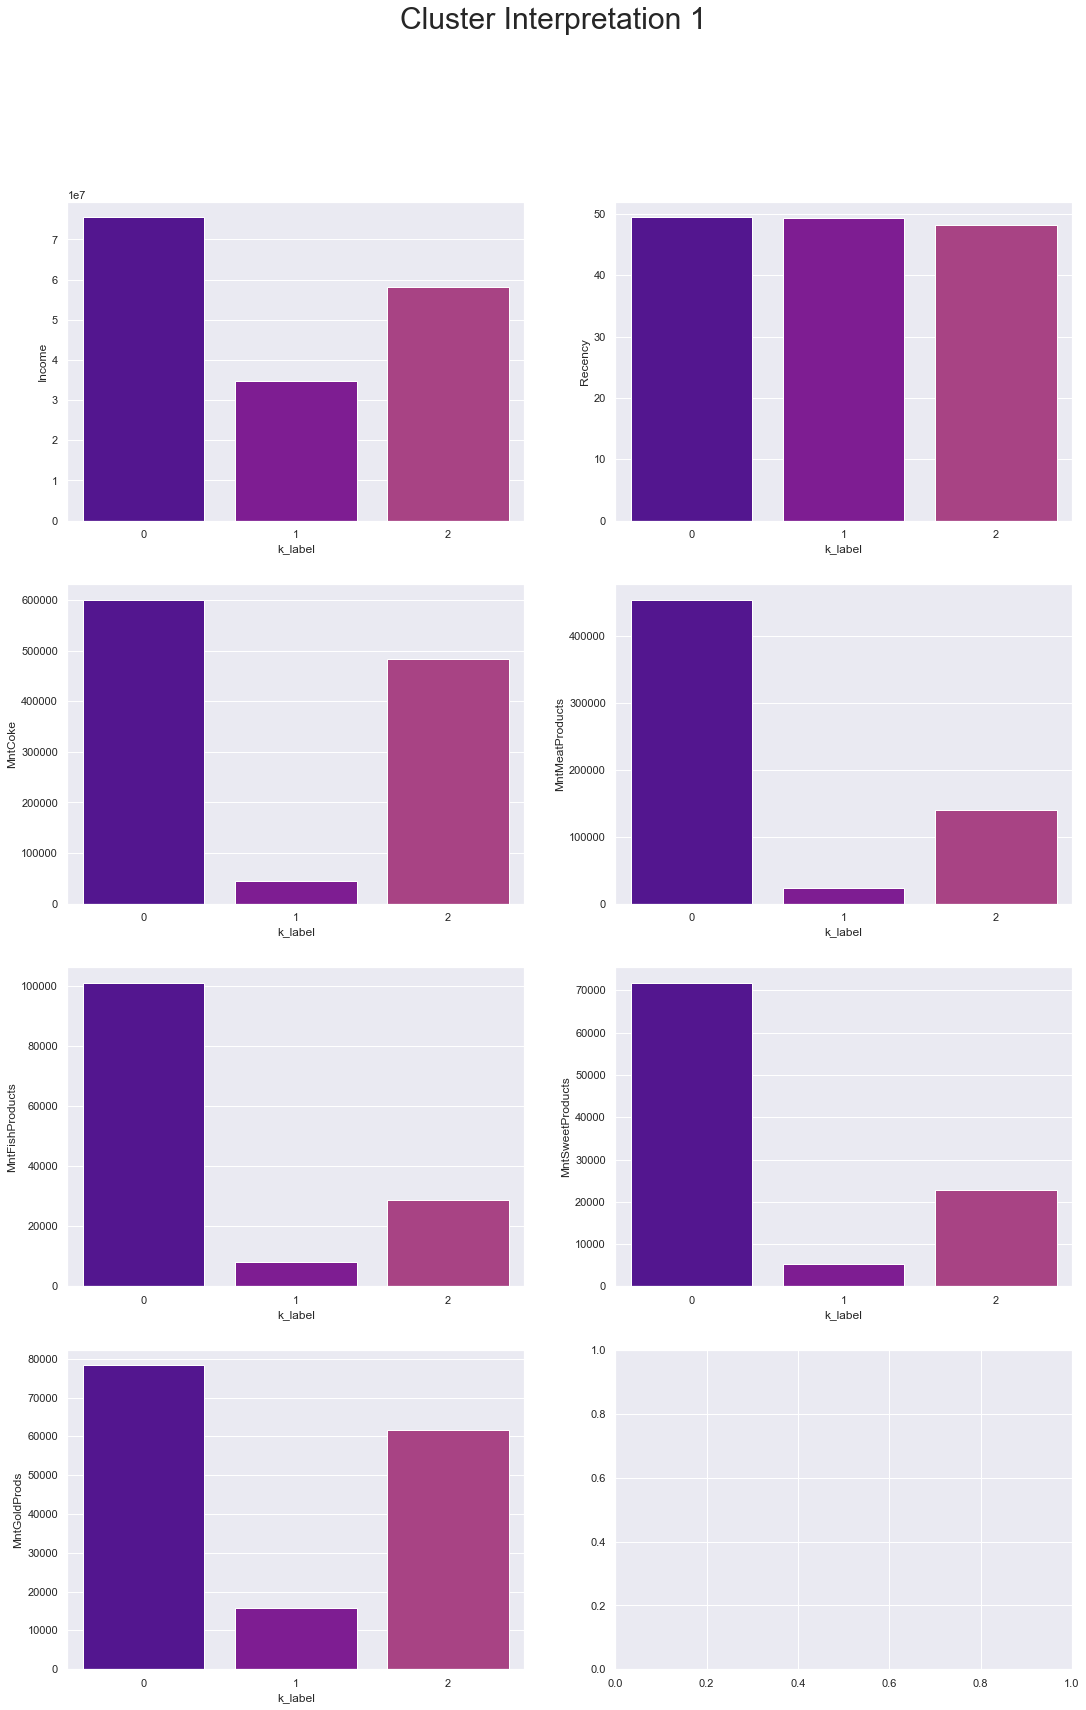

In [55]:
fig, axes = plt.subplots(4, 2, sharex=False, figsize=(18,27))
fig.suptitle('Cluster Interpretation 1', size = 30)

sns.barplot(ax=axes[0, 0], data=df_cluster_interpretation_1, x='k_label', y='Income')
sns.barplot(ax=axes[0, 1], data=df_cluster_interpretation_1, x='k_label', y='Recency')
sns.barplot(ax=axes[1, 0], data=df_cluster_interpretation_1, x='k_label', y='MntCoke')
sns.barplot(ax=axes[1, 1], data=df_cluster_interpretation_1, x='k_label', y='MntMeatProducts')
sns.barplot(ax=axes[2, 0], data=df_cluster_interpretation_1, x='k_label', y='MntFishProducts')
sns.barplot(ax=axes[2, 1], data=df_cluster_interpretation_1, x='k_label', y='MntSweetProducts')
sns.barplot(ax=axes[3, 0], data=df_cluster_interpretation_1, x='k_label', y='MntGoldProds')
plt.show()

In [56]:
df_cluster_interpretation_2 = df_final.groupby('k_label').agg({'NumDealsPurchases' : 'mean',
                                                               'NumWebPurchases' : 'mean',
                                                               'NumCatalogPurchases' : 'mean',
                                                               'NumStorePurchases' : 'mean',
                                                               'NumWebVisitsMonth' : 'mean',
                                                               'NumOfChildren' : 'mean',
                                                               'CRT_Campaign' : 'mean'}).reset_index()
df_cluster_interpretation_2

,k_label,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,NumOfChildren,CRT_Campaign
0,0,1.256098,5.247387,5.912892,8.407666,2.817073,0.216028,16.602787
1,1,2.029245,2.161321,0.573585,3.282075,6.443396,1.223585,2.919811
2,2,3.863866,6.447059,3.151261,7.816807,5.786555,1.178151,6.934454


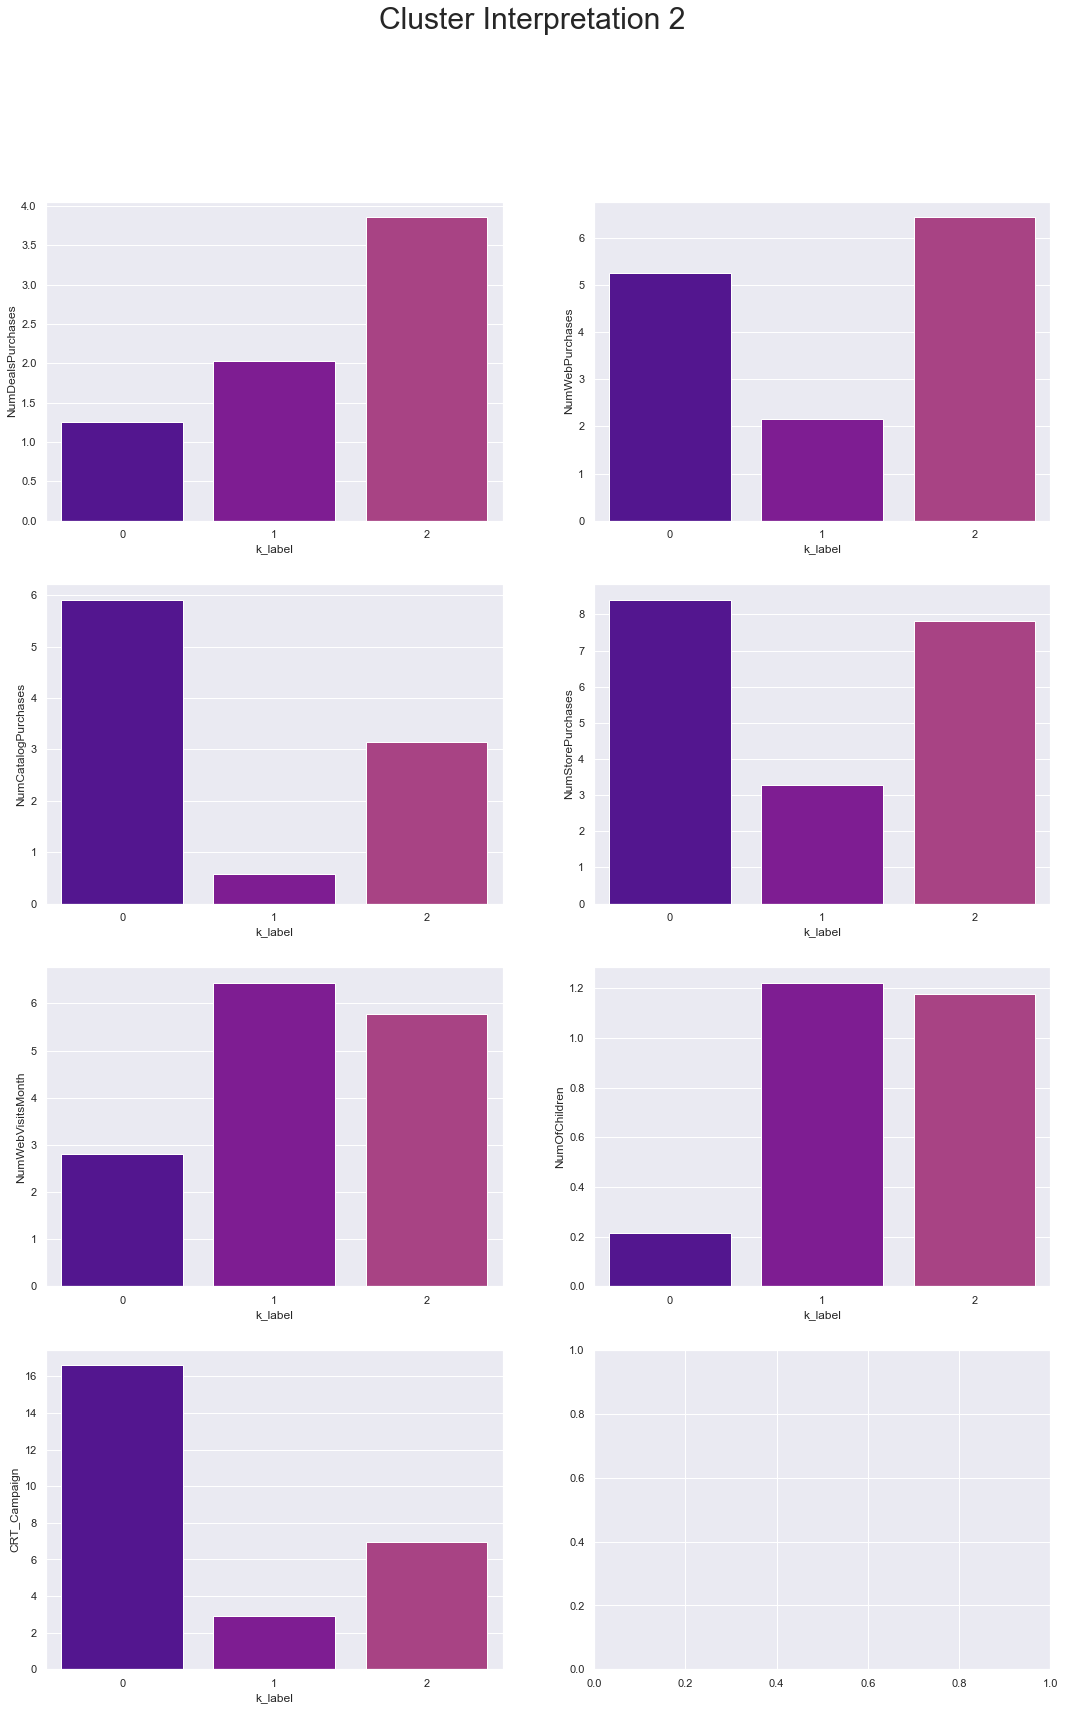

In [57]:
fig, axes = plt.subplots(4, 2, sharex=False, figsize=(18,27))
fig.suptitle('Cluster Interpretation 2', size = 30)

sns.barplot(ax=axes[0, 0], data=df_cluster_interpretation_2, x='k_label', y='NumDealsPurchases')
sns.barplot(ax=axes[0, 1], data=df_cluster_interpretation_2, x='k_label', y='NumWebPurchases')
sns.barplot(ax=axes[1, 0], data=df_cluster_interpretation_2, x='k_label', y='NumCatalogPurchases')
sns.barplot(ax=axes[1, 1], data=df_cluster_interpretation_2, x='k_label', y='NumStorePurchases')
sns.barplot(ax=axes[2, 0], data=df_cluster_interpretation_2, x='k_label', y='NumWebVisitsMonth')
sns.barplot(ax=axes[2, 1], data=df_cluster_interpretation_2, x='k_label', y='NumOfChildren')
sns.barplot(ax=axes[3, 0], data=df_cluster_interpretation_2, x='k_label', y='CRT_Campaign')
plt.show()

In [58]:
df_cluster_interpretation_3 = df_final.groupby('k_label').agg({'Group_Age_Pekerja Awal (25-34 Tahun)' : 'sum',
                                                               'Group_Age_Paruh Baya (35-44 Tahun)' : 'sum',
                                                               'Group_Age_Pra-Pensiun (45-54 Tahun)' : 'sum',
                                                               'Group_Age_Usia Pensiun (55-64 Tahun)' : 'sum',
                                                               'Group_Age_Lanjut Usia (65 Tahun Ke Atas)' : 'sum',
                                                               }).reset_index()
df_cluster_interpretation_3

,k_label,Group_Age_Pekerja Awal (25-34 Tahun),Group_Age_Paruh Baya (35-44 Tahun),Group_Age_Pra-Pensiun (45-54 Tahun),Group_Age_Usia Pensiun (55-64 Tahun),Group_Age_Lanjut Usia (65 Tahun Ke Atas)
0,0,51,118.0,136.0,123,146
1,1,65,271.0,377.0,194,153
2,2,4,44.0,213.0,171,163


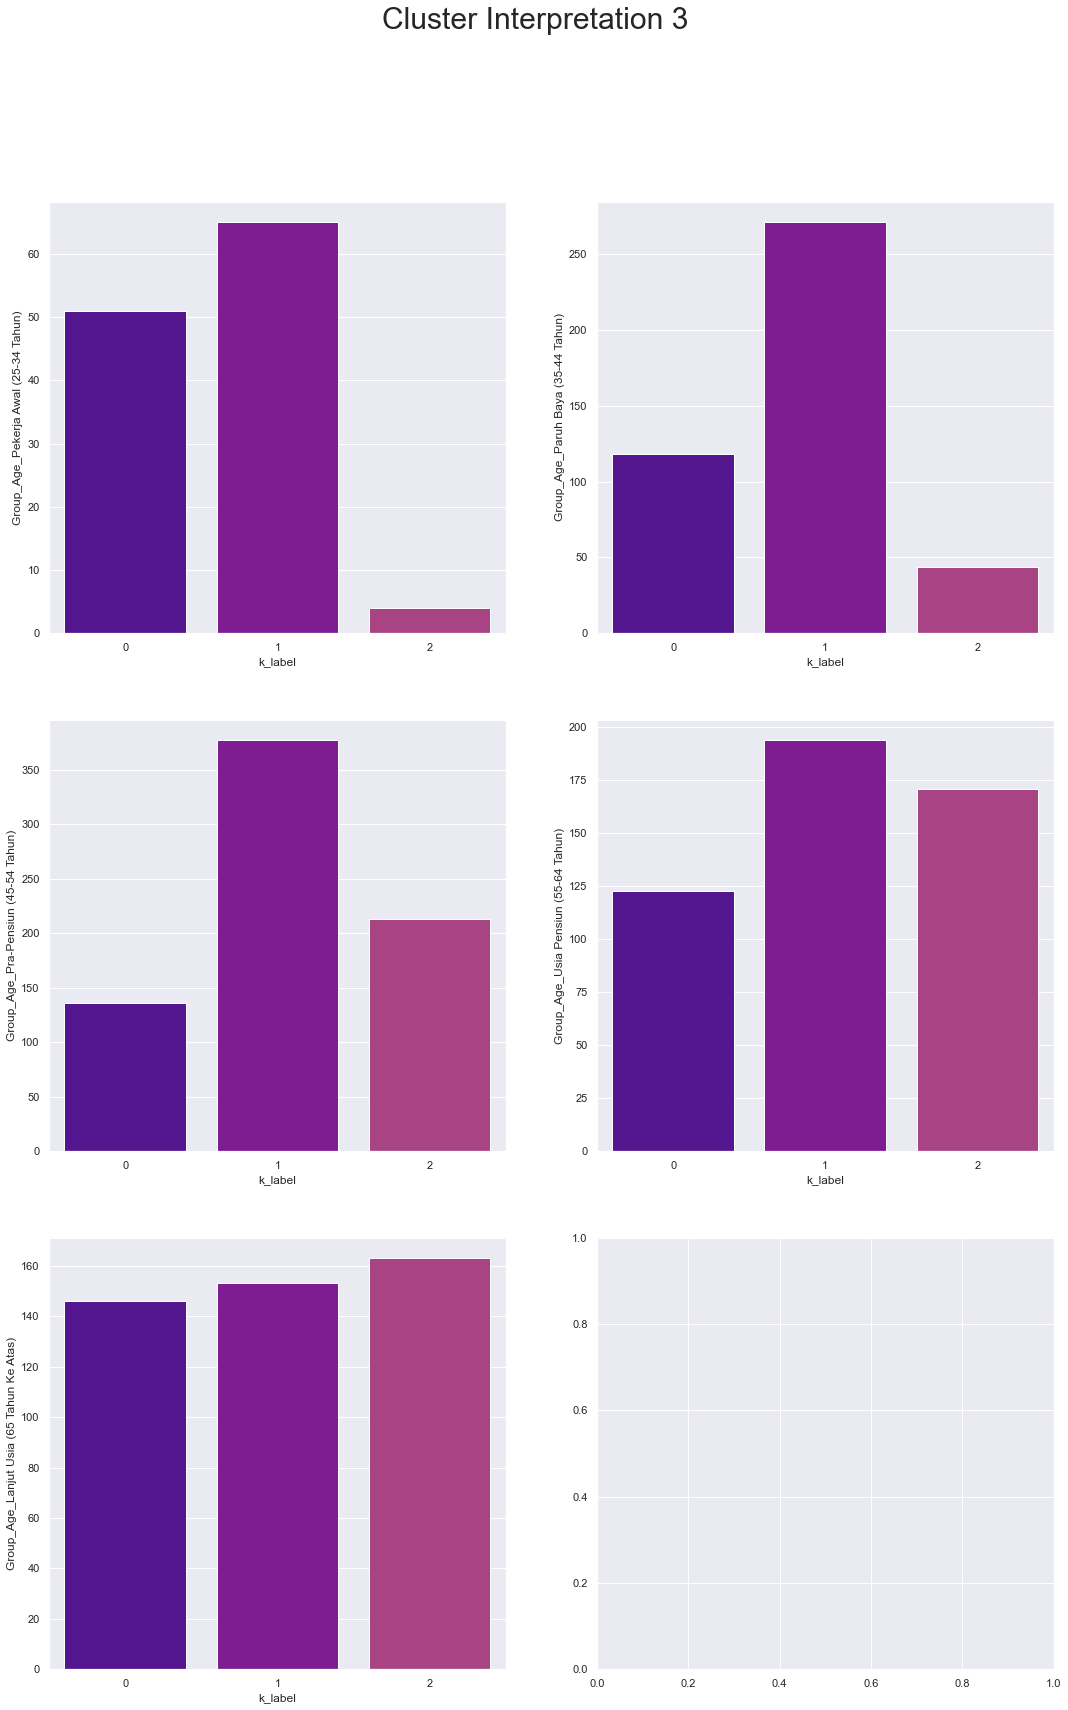

In [59]:
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(18,27))
fig.suptitle('Cluster Interpretation 3', size = 30)

sns.barplot(ax=axes[0, 0], data=df_cluster_interpretation_3, x='k_label', y='Group_Age_Pekerja Awal (25-34 Tahun)')
sns.barplot(ax=axes[0, 1], data=df_cluster_interpretation_3, x='k_label', y='Group_Age_Paruh Baya (35-44 Tahun)')
sns.barplot(ax=axes[1, 0], data=df_cluster_interpretation_3, x='k_label', y='Group_Age_Pra-Pensiun (45-54 Tahun)')
sns.barplot(ax=axes[1, 1], data=df_cluster_interpretation_3, x='k_label', y='Group_Age_Usia Pensiun (55-64 Tahun)')
sns.barplot(ax=axes[2, 0], data=df_cluster_interpretation_3, x='k_label', y='Group_Age_Lanjut Usia (65 Tahun Ke Atas)')

plt.show()

In [60]:
df_cluster_interpretation_4 = df_final.groupby('k_label').agg({'Education_SMA' : 'sum',
                                                               'Education_D3' : 'sum',
                                                               'Education_S1' : 'sum',
                                                               'Education_S2' : 'sum',
                                                               'Education_S3' : 'sum'}).reset_index()
df_cluster_interpretation_4

,k_label,Education_SMA,Education_D3,Education_S1,Education_S2,Education_S3
0,0,0,56,329.0,78,111
1,1,53,115,530.0,173,189
2,2,1,30,265.0,118,181


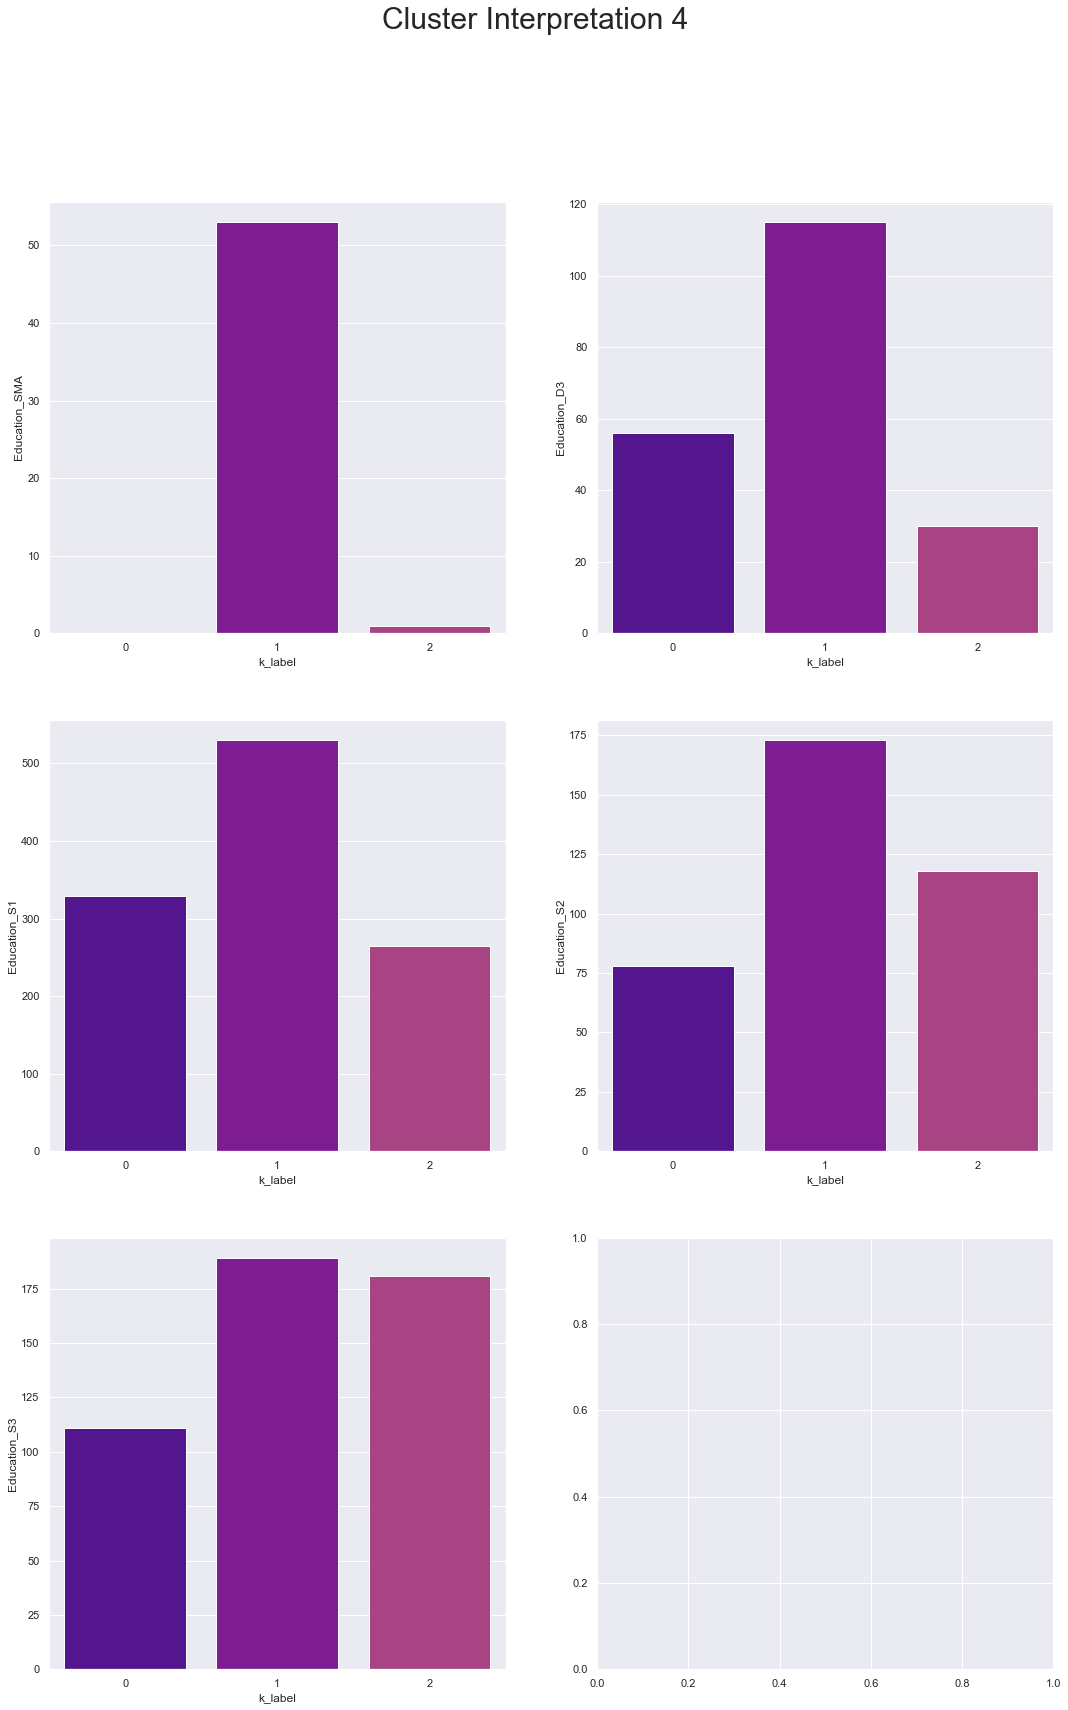

In [61]:
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(18,27))
fig.suptitle('Cluster Interpretation 4', size = 30)

sns.barplot(ax=axes[0, 0], data=df_cluster_interpretation_4, x='k_label', y='Education_SMA')
sns.barplot(ax=axes[0, 1], data=df_cluster_interpretation_4, x='k_label', y='Education_D3')
sns.barplot(ax=axes[1, 0], data=df_cluster_interpretation_4, x='k_label', y='Education_S1')
sns.barplot(ax=axes[1, 1], data=df_cluster_interpretation_4, x='k_label', y='Education_S2')
sns.barplot(ax=axes[2, 0], data=df_cluster_interpretation_4, x='k_label', y='Education_S3')

plt.show()

In [62]:
df_cluster_interpretation_5 = df_final.groupby('k_label').agg({'Marital_Status_Bertunangan' : 'sum',
                                                               'Marital_Status_Cerai' : 'sum',
                                                               'Marital_Status_Duda' : 'sum',
                                                               'Marital_Status_Janda' : 'sum',
                                                               'Marital_Status_Lajang' : 'sum',
                                                               'Marital_Status_Menikah' : 'sum'}).reset_index()
df_cluster_interpretation_5

,k_label,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,0,150.0,51,0,25,146,202.0
1,1,276.0,98,2,27,250,407.0
2,2,149.0,81,1,25,87,252.0


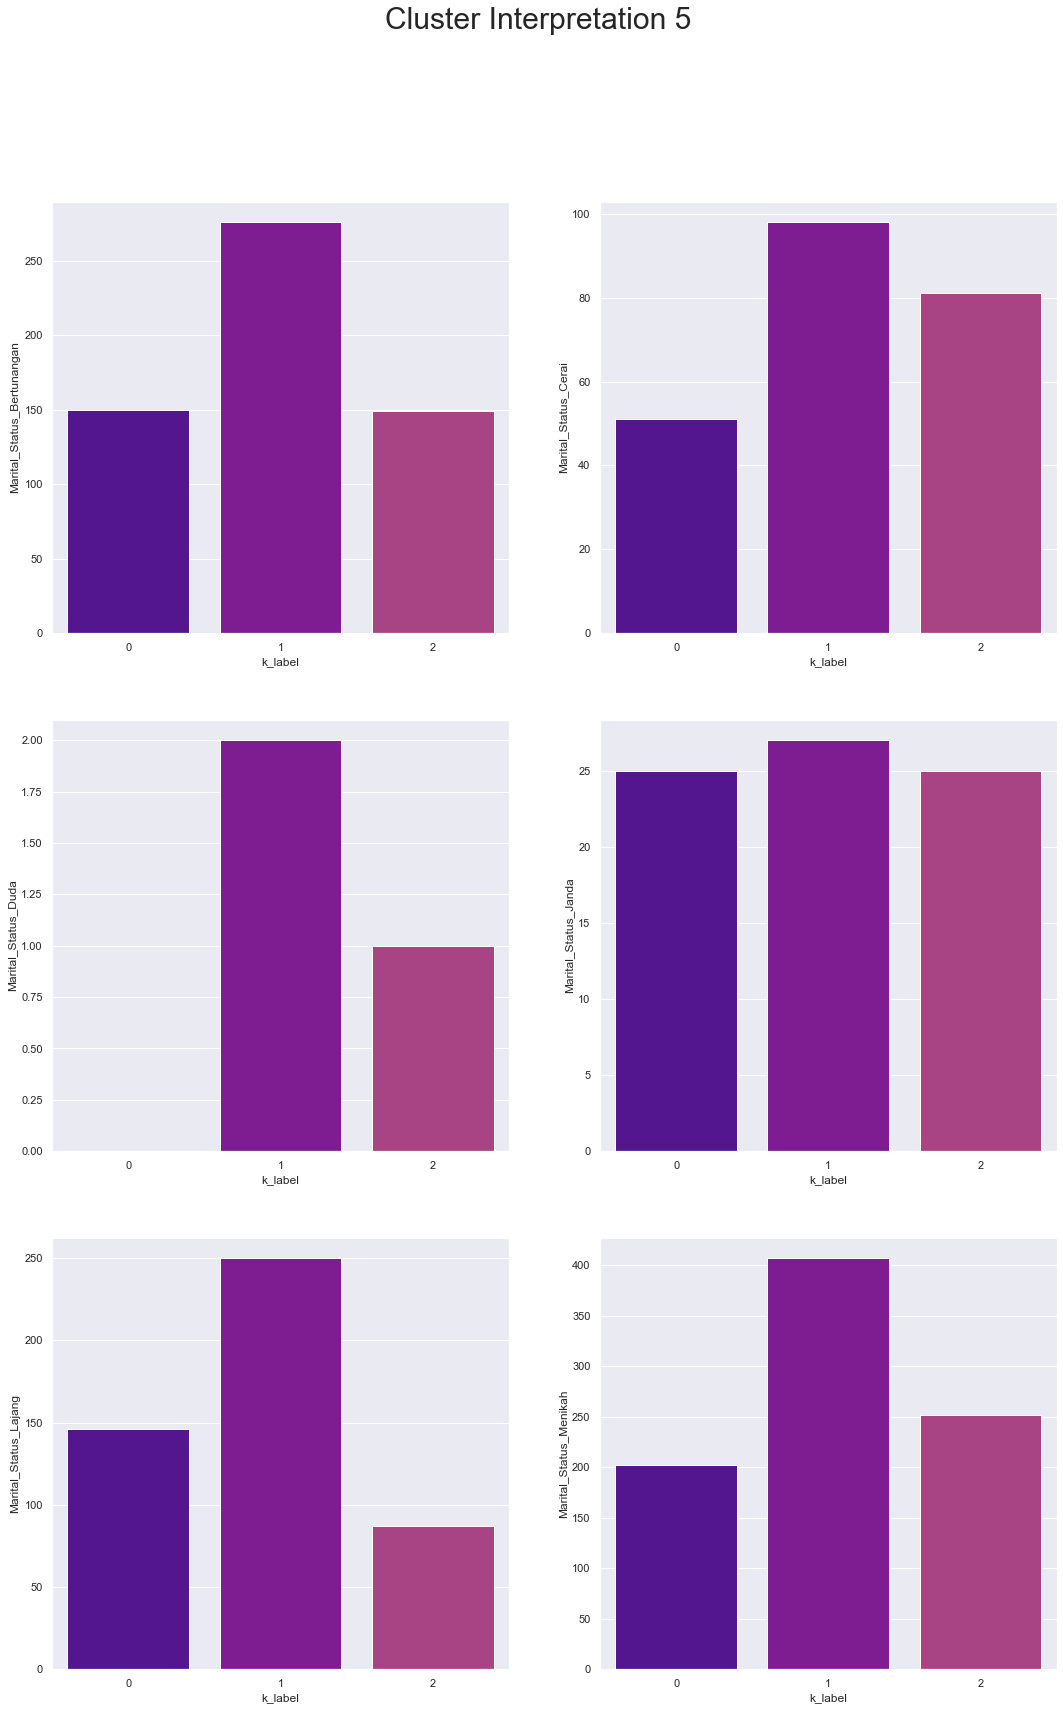

In [63]:
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(18,27))
fig.suptitle('Cluster Interpretation 5', size = 30)

sns.barplot(ax=axes[0, 0], data=df_cluster_interpretation_5, x='k_label', y='Marital_Status_Bertunangan')
sns.barplot(ax=axes[0, 1], data=df_cluster_interpretation_5, x='k_label', y='Marital_Status_Cerai')
sns.barplot(ax=axes[1, 0], data=df_cluster_interpretation_5, x='k_label', y='Marital_Status_Duda')
sns.barplot(ax=axes[1, 1], data=df_cluster_interpretation_5, x='k_label', y='Marital_Status_Janda')
sns.barplot(ax=axes[2, 0], data=df_cluster_interpretation_5, x='k_label', y='Marital_Status_Lajang')
sns.barplot(ax=axes[2, 1], data=df_cluster_interpretation_5, x='k_label', y='Marital_Status_Menikah')

plt.show()

## Parallel Coordinates Plot

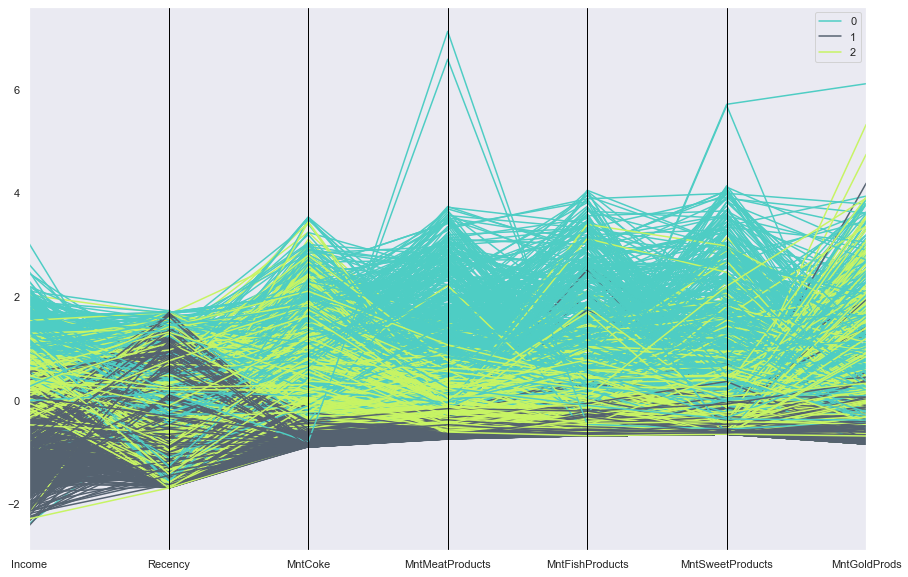

In [64]:
df_1 = df_cluster[['Income','Recency','MntCoke','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','k_label']]

plt.figure(figsize=(15,10))
pd.plotting.parallel_coordinates(df_1, 'k_label', sort_labels=bool, color=('#556270', '#4ECDC4', '#C7F464'))

plt.show()

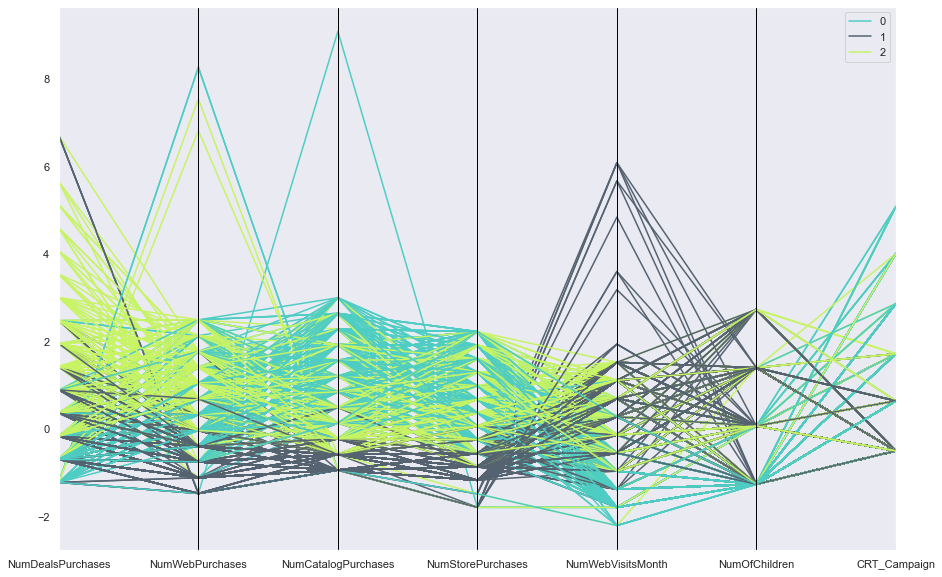

In [65]:
df_2 = df_cluster[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','NumOfChildren','CRT_Campaign','k_label']]

plt.figure(figsize=(15,10))
pd.plotting.parallel_coordinates(df_2, 'k_label', sort_labels=bool, color=('#556270', '#4ECDC4', '#C7F464'))
plt.show()

In [66]:
# 0 = MntMeatProduct , MntSweetProducts , NumWebPurchases, NumCatalogPurchases, CRT_Campaign
# 1 = MntFishProducts, MntGoldProds, NumWebVisitsMonth
# 2 = MntCoke, MntGoldProds, NumDealsPurchases, NumWebPurchases